# Assignment - Part II

Here we develop a multi-layer perceptron for chaotic time-series prediction. A test is run on the Mackey-Glass time series:
$$
\frac{dx}{dt} = \beta\frac{x(t-\tau)}{1+x^n(t-\tau)}-\gamma x, \qquad \gamma,\beta,n > 0
$$

Here $\beta=0.2$, $\gamma=0.1$, $n=10$ and $\tau>17$ (here we set $\tau=25$). The equation can be solved with Euler's method:
$$
x(t+1)=x(t)+\frac{0.2x(t-25)}{1+x^{10}(t-25)} - 0.1x(t).
$$

We will use this iterative formula with $x(t)=0$ for $t<1$.

## 4.1 Data

We will predict x(t+5) from five past values of the time series. We will pick 1200 points from $t=[301,1500]$. Error will be predicted using mean squared error.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

# WHAT IS THE INITIAL CONDITION?

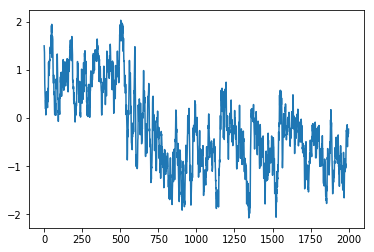

In [285]:
# Euler's method to approximate Mackey-Glass time series
timePoints = 2000
x = np.zeros(timePoints)

# Use initial condition of 0.5
# Generate Data
def generate_Data(timePoints, initialCond, x):
    for t in range(timePoints):
        if t < 1:
            x[t] = initialCond
            continue
        x[t] = x[t-1] + 0.2*x[t-25]/(1+np.power(x[t-25],10)) - 0.1*x[t-1]
        x[t] += np.random.normal(0, .18, 1)

generate_Data(timePoints, 1.5, x)
plt.plot(x)


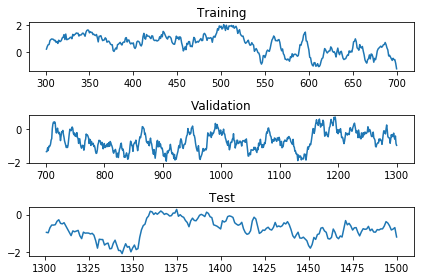

In [286]:
# Create 1200 points from t=301 to 1500
t = np.arange(301,1501,1)

# Split the data into training, validation and test. We will have 200
# hundred points for validation and testing
train = x[t[:400]]
validation = x[t[400:1000]]
test = x[t[1000:]]


plt.subplot(3,1,1)
plt.plot(t[:400],train)
plt.title("Training")
plt.subplot(3,1,2)
plt.plot(t[400:1000],validation)
plt.title("Validation")
plt.subplot(3,1,3)
plt.plot(t[1000:],test)
plt.title("Test")
plt.tight_layout()
plt.show()



## 4.2 Network Configuration

Will use sklearns MLP function with **five** inputs (previous 5 time points) and **one** output (predicted value). We are using a **batch backprop** algorithm with **early stopping** based on error estimate on the validation data subset. We are also using some regularisation techniques (weight decay?). 

We are evaluating both two and three layer perceptrons with varying number of nodes in the hidden layers (max 8 per layer). Also parameterise the regularisation method and monitor speed of convergence. 

### Train Neural Network 

Here we can evaluate the training process based on the validation set performance and do things like early stopping. Can also experiment with regularisation methods and/or different sized neural networks.

In [88]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

# First test, perceptron with 1 hidden layer with 4 nodes. Warm_start
# is true so we can monitor the progress
#minTrainErrors = []


alphas = [1e-5, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 1e6]
hiddenLayers = [1,2,3,4,5,6,7,8]


valErrorsTotal = []
#for layer in hiddenLayers:
#    valErrors = []
#    trainErrors = []
   # for  in alphas:
        clf = MLPRegressor(solver = "lbfgs", alpha=alpha, hidden_layer_sizes=(8,),
                           warm_start=True, max_iter=100, random_state=3)

        # Reshape the data. This should be used for training, validation, test
        # data before feeding into the sklearn regressor function
        # X is now a matrix of [numsamples X numdim] where numdim = 5
        def reshape_Data(data):
            X = np.zeros((len(data)-25,5))
            Y = np.zeros(len(data)-25)

            # Start prediction T=25 at T=20 in order to have enough previous
            # time points
            for i in range(20, len(data)-5):
                X[i-20] = [data[i-20], data[i-15], data[i-10], data[i-5], data[i]]
                Y[i-20] = data[i+5]

            return X,Y

        #def MSE(predict, true):
        #    return np.sum((true-predict)**2)/len(predict)


        # Get data so it's ready for training
        trainX, trainY = reshape_Data(train)
        # Reshape the validation data
        valX, valY = reshape_Data(validation)


        #minErr = 10**10

        #for iter in range(400):
            # Train the MLP
        clf.fit(trainX,trainY)
        Y = clf.predict(trainX)
        predY = clf.predict(valX)
        valError = mean_squared_error(predY, valY)
        trainError = mean_squared_error(trainY, Y)

        #if (100*(minErr/valError - 1) < 0.1):
        #    print(minErr, valError, iter, i)
            #minValErrors.append(minErr)
        #    break
        #if (valError < minErr):
        #    minErr = valError
        #    bestModel = clone(clf)
        #print("Iteration", i, "MSE", error)
        #valErrors.append(valError)
        #trainErrors.append(trainError)
    #valErrorsTotal.append(valErrors)
   # print(valErrors)
    
   # plt.plot(valErrors, label="Validation Error")
   # plt.plot(trainErrors, label ="Training Error")
   # plt.legend()
#print(valErrorsTotal)

[0.052675243170012244, 0.052675791064513394, 0.05267961192868974, 0.052693225134419555, 0.008162832484552655, 0.01379460500851182, 0.05267806542543815, 0.05268704990674106, 0.052684220314580345]
[0.05268433871012176, 0.05268433732129743, 0.052684324971217306, 0.052684380748292826, 0.05268394759734075, 0.052680470889398756, 0.05268300422877739, 0.05267858969829566, 0.052684423857452756]
[0.05267508615514265, 0.05267507520918072, 0.052674835582157485, 0.008170159989886312, 0.05268741005659647, 0.010433644749318034, 0.052690758934328945, 0.05267607024520327, 0.05268430223982059]
[0.007739177837667388, 0.00774275345658923, 0.007762941469214279, 0.007737844689459461, 0.008149063386272554, 0.01382859128916343, 0.052686340556538855, 0.05268332688275925, 0.052684349004265524]
[0.011920314585683777, 0.009112391432217228, 0.010680864328032807, 0.007726538719914556, 0.008172860588587669, 0.013796636424499315, 0.05268223311767912, 0.05268523846284708, 0.05268433827453529]
[0.007719349571214804, 0.

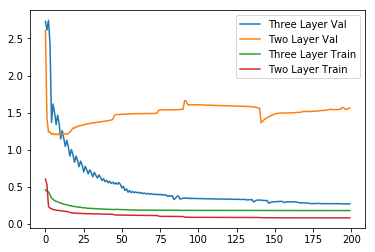

In [305]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

alphas = [0.1, 1, 10, 50, 100]
valErrors=[]

def reshape_Data(data):
    X = np.zeros((len(data)-25,5))
    Y = np.zeros(len(data)-25)

    # Start prediction T=25 at T=20 in order to have enough previous
    # time points
    for i in range(20, len(data)-5):
        X[i-20] = [data[i-20], data[i-15], data[i-10], data[i-5], data[i]]
        Y[i-20] = data[i+5]

    return X,Y   


#for j in range(10):
clf = MLPRegressor(solver = "lbfgs", alpha=10, hidden_layer_sizes=(8, 5),
                           warm_start=True, max_iter=1)
dlf = MLPRegressor(solver = "lbfgs", alpha=0.1, hidden_layer_sizes=(8),
                           warm_start=True, max_iter=1)



#def MSE(predict, true):
#    return np.sum((true-predict)**2)/len(predict)


# Get data so it's ready for training
trainX, trainY = reshape_Data(train)
# Reshape the validation data
valX, valY = reshape_Data(validation)

valError = []
valError2 = []
trainError = []
trainError2 = []
for iter in range(200):
    clf.fit(trainX,trainY)
    dlf.fit(trainX,trainY)

    Y = clf.predict(trainX)
    Y2 = dlf.predict(trainX)

    predY = clf.predict(valX)
    predY2 = dlf.predict(valX)

    valError.append(mean_squared_error(predY, valY))
    trainError.append(mean_squared_error(Y, trainY))
    valError2.append(mean_squared_error(predY2, valY))
    trainError2.append(mean_squared_error(Y2, trainY))
#valError.append(valError)

    
#testError /= 20
#testError2 /= 20
#print(testError, testError2)


plt.plot(valError, label="Three Layer Val")
plt.plot(valError2, label="Two Layer Val")
plt.plot(trainError, label="Three Layer Train")
plt.plot(trainError2, label="Two Layer Train")
plt.legend()



# Sigma = 0.18 8,5 alpha = 10
# Sigma = 0.09 8,7 alpha = 0.1
# Sigma = 0.03 8,6 alpha = 1

0.1550407018661218 0.18030747496891458
0.13327680316828527 0.13726487500531287
0.12438434348307932 0.12443677142470107

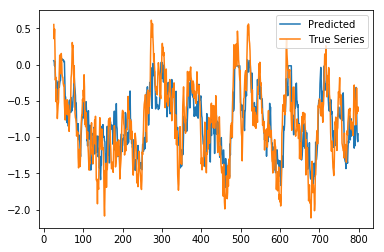

In [207]:
Y = clf.predict(trainX)
#plt.plot(validation)
# Plot the predicted series and compare to the true time series
plt.plot(range(25, len(train)), Y, label="Predicted")
plt.plot(range(25, len(train)), trainY, label="True Series")
plt.legend()


### Evaluate Performance on the Validation Data

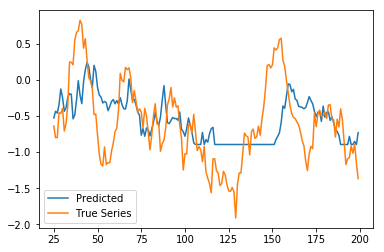

In [270]:
predY = clf.predict(valX)
#plt.plot(validation)
# Plot the predicted series and compare to the true time series
plt.plot(range(25, len(validation)), predY, label="Predicted")
plt.plot(range(25, len(validation)), valY, label="True Series")
plt.legend()


### Evaluate Performance on Test Data

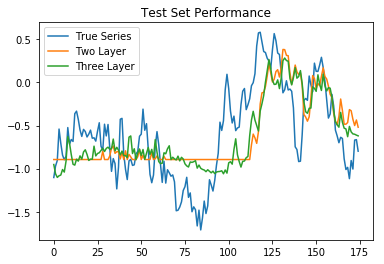

In [271]:
testX, testY = reshape_Data(test)
guessY = clf.predict(testX)
guessY2 = dlf.predict(testX)
plt.plot(testY, label="True Series")
plt.plot(guessY, label="Two Layer")
plt.plot(guessY2, label="Three Layer")
plt.title("Test Set Performance")
plt.legend()